# How the colors of LEGOs included in sets changed over time?

In [1]:
import pandas as pd
import numpy as np

In [25]:
#Loading the file of colors and check if the color id in unique
colorfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/colors.csv'
color = pd.read_csv(colorfile,index_col="id")
color.head()
color.index.is_unique  
color = pd.read_csv(colorfile)

In [18]:
#Loading the file of invertory parts.
invenPartsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventory_parts.csv'
inven_part = pd.read_csv(invenPartsfile, index_col="inventory_id")
inven_part.head()
inven_part.index.is_unique
#The inventory id is not unique
inven_part = pd.read_csv(invenPartsfile)

In [26]:
#Loading the file of inventory.
invefile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/inventories.csv'
inven = pd.read_csv(invefile, index_col="id")
inven.head()
inven.index.is_unique
inven = pd.read_csv(invefile)

In [27]:
#Loading the file of sets
setsfile = '/Users/jingruma/Desktop/Data Science/Database Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile, index_col="set_num")
sets.head()
sets.index.is_unique
sets = pd.read_csv(setsfile)

In [44]:
#inner join colors and inventory parts
ci=pd.merge(color,inven_part,left_on="id",right_on="color_id",how="inner")
#drop the repeat column
ci = ci.drop(ci.columns[0],axis=1)
ci.head()

,name,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare
0,Unknown,0033B2,f,80,belvfair6,-1,1,f
1,Unknown,0033B2,f,80,belvfem26,-1,1,f
2,Unknown,0033B2,f,80,belvmale13,-1,1,f
3,Unknown,0033B2,f,214,fab6e,-1,1,f
4,Unknown,0033B2,f,250,belvfair4,-1,1,f


In [45]:
#inner join ci and inventories
cii = pd.merge(ci,inven,left_on="inventory_id",right_on="id",how="inner")
#drop the repeat column
cii = cii.drop(cii.columns[8],axis=1)
cii.head()

,name,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1


In [49]:
color.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [55]:
#inner join cii and sets
ciis = pd.merge(cii,sets,on="set_num",how="inner")
ciis.head()

,name_x,rgb,is_trans,inventory_id,part_num,color_id,quantity,is_spare,version,set_num,name_y,year,theme_id,num_parts
0,Unknown,0033B2,f,80,belvfair6,-1,1,f,1,5827-1,Royal Coach,2000,319,85
1,Unknown,0033B2,f,80,belvfem26,-1,1,f,1,5827-1,Royal Coach,2000,319,85
2,Unknown,0033B2,f,80,belvmale13,-1,1,f,1,5827-1,Royal Coach,2000,319,85
3,Blue,0055BF,f,80,33211,1,2,f,1,5827-1,Royal Coach,2000,319,85
4,Blue,0055BF,f,80,33212,1,2,f,1,5827-1,Royal Coach,2000,319,85


In [82]:
ciis2000=ciis.loc[ciis['year'] == 2000]

In [72]:
#count number of colors that are using in different years. include no color and unknown.
count = ciis.groupby(['year'],as_index=False)['color_id'].count()
count.head()

,year,color_id
0,1950,46
1,1953,18
2,1954,98
3,1955,193
4,1956,83


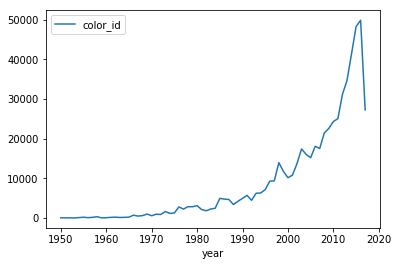

In [73]:
import matplotlib.pyplot as plt
count.set_index('year',inplace=True)
count.plot()